<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/unitOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculation of unit operations
In the follwing examples we demonstrate calculations of various unit operations.

We will use a NeqSim Python API that has been developed at NTNU.

In [ ]:
%%capture
! apt update -q
! apt-get install -q openjdk-25-jdk-headless -q
!pip install neqsim -q
from neqsim import jneqsim

# Simulation of a throttling process using a JT-valve
A valve is calculated as an isenthalpic process. The temperature of the gas will typically drop due to the Joule Thomson effect.

Text(0, 0.5, 'Temperature [C]')

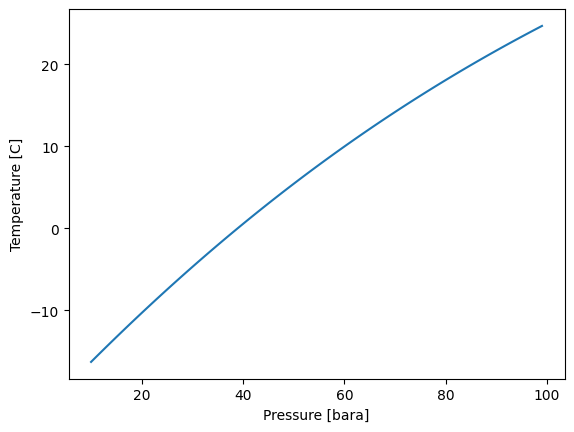

In [2]:
#@title  { run: "auto" }
#@title  { run: "auto" }
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve
import numpy as np
import matplotlib.pyplot as plt
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen", "hydrogen"]
inletTemperature = 25.0 #@param
inletPressure = 100.0 #@param
minOutletPressure = 10.0 #@param
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0)

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(1200.0, 'kg/hr')
# demonstration of setting up a simple process calculation

clearProcess()
stream1 = stream(fluid1)
valve1 = valve(stream1)

def outTemp(pressure):
  valve1.setOutletPressure(pressure)
  runProcess()
  return valve1.getOutStream().getTemperature('C')

pressure = np.arange(minOutletPressure, inletPressure, int((inletPressure-minOutletPressure)/100)+1)
temperature = [outTemp(P) for P in pressure]

plt.figure()
plt.plot(pressure, temperature)
plt.xlabel('Pressure [bara]')
plt.ylabel('Temperature [C]')

# Simulation of an expansion process using a turbo expander

Text(0, 0.5, 'Temperature [C]')

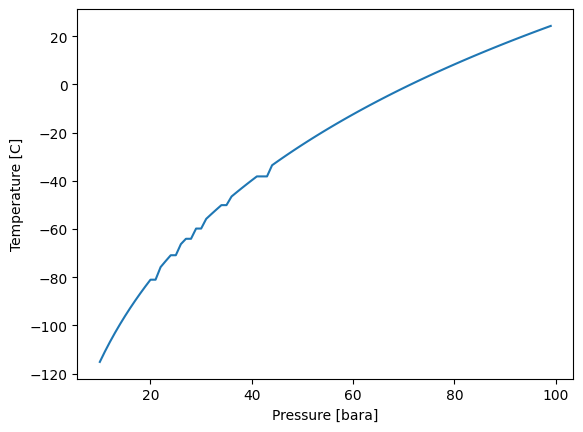

In [8]:
#@title  { run: "auto" }
#@title  { run: "auto" }
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, expander
import numpy as np
import matplotlib.pyplot as plt
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen", "hydrogen"]
inletTemperature = 25.0 #@param
inletPressure = 100.0 #@param
minOutletPressure = 10.0 #@param
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0)

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(1200.0, 'kg/hr')
# demonstration of setting up a simple process calculation

clearProcess()
stream1 = stream(fluid1)
expander1 = expander(stream1, 1.0)

def outTemp(pressure):
  expander1.setOutletPressure(pressure)
  runProcess()
  return expander1.getOutStream().getTemperature('C')

pressure = np.arange(minOutletPressure, inletPressure, int((inletPressure-minOutletPressure)/100)+1)
temperature = [outTemp(P) for P in pressure]

plt.figure()
plt.plot(pressure, temperature)
plt.xlabel('Pressure [bara]')
plt.ylabel('Temperature [C]')

# Simulation of a compression process

Text(0, 0.5, 'Power [W/(kg/hr)]')

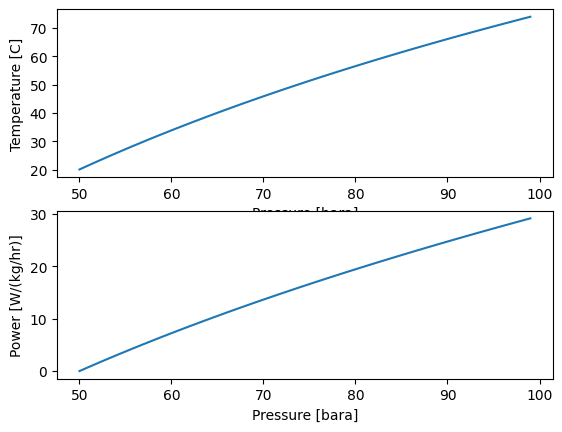

In [12]:
#@title  { run: "auto" }
#@title  { run: "auto" }
#@title  { run: "auto" }
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, compressor
import numpy as np
import matplotlib.pyplot as plt
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen", "hydrogen"]
inletTemperature = 20.0 #@param
inletPressure = 50.0 #@param
outletPressure = 100.0 #@param
flowrate = 1.0 #@param
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0)
fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(flowrate, 'kg/hr')

clearProcess()
stream1 = stream(fluid1)
compressor1 = compressor(stream1, 50.0)

def outTemp(pressure):
  compressor1.setOutletPressure(pressure)
  runProcess()
  return compressor1.getOutStream().getTemperature('C')

def powerCalc(pressure):
  compressor1.setOutletPressure(pressure)
  runProcess()
  return compressor1.getPower()

pressure = np.arange(inletPressure*1.0001, outletPressure, int((outletPressure-inletPressure)/100)+1)
power = [powerCalc(P) for P in pressure]
temperature = [outTemp(P) for P in pressure]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(pressure, temperature)
plt.xlabel('Pressure [bara]')
plt.ylabel('Temperature [C]')
plt.subplot(2, 1, 2)
plt.plot(pressure, power)
plt.xlabel('Pressure [bara]')
plt.ylabel('Power [W/(kg/hr)]')

# Simulation of a separation process

In [5]:
import neqsim
from neqsim.thermo.thermoTools import *

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole to the fluid
fluid1.addComponent('nC10', 1.0) #adding 1 mole to the fluid
fluid1.setTemperature(50.0, 'C')
fluid1.setPressure(40.0, 'bara')
TPflash(fluid1)
fluid1.initProperties()
print("number of phases ", fluid1.getNumberOfPhases())
print("gas density ", fluid1.getPhase("gas").getDensity("kg/m3"), " kg/m3")
print("oil density ", fluid1.getPhase("oil").getDensity("kg/m3"), " kg/m3")

printFrame(fluid1)

number of phases  2
gas density  25.172652561677165  kg/m3
oil density  702.1817350942202  kg/m3
| 0                  | 1           | 2          | 3          | 4   | 5   | 6               |
|:-------------------|:------------|:-----------|:-----------|:----|:----|:----------------|
|                    | total       | GAS        | OIL        |     |     |                 |
| methane            | 5E-1        | 9.99332E-1 | 1.76799E-1 |     |     | [mole fraction] |
| nC10               | 5E-1        | 6.67945E-4 | 8.23201E-1 |     |     | [mole fraction] |
|                    |             |            |            |     |     |                 |
| Density            |             | 2.51727E1  | 7.02182E2  |     |     | [kg/m^3]        |
| PhaseFraction      |             | 3.92934E-1 | 6.07066E-1 |     |     | [mole fraction] |
| MolarMass          | 7.9164E1    | 1.61273E1  | 1.19966E2  |     |     | [kg/kmol]       |
| Z factor           |             | 9.54857E-1 | 3.11745E-1 |    